In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
!python toloka.py pair-statistic '' 4535156 > /dev/null

In [3]:
df = pd.read_csv('pool_4535156_results.csv', index_col='Unnamed: 0')

In [4]:
pd.options.display.max_columns = 50
df.head()

pool_id  overlap  infinite_overlap                  created  \
0  4535156     10.0             False  2019-04-11T08:52:21.610   
1  4535156     10.0             False  2019-04-11T08:52:21.610   
2  4535156     10.0             False  2019-04-11T08:52:21.610   
3  4535156     10.0             False  2019-04-11T08:52:21.610   
4  4535156      NaN              True  2019-04-11T08:52:21.610   

                                          image_left  \
0  highlightdisk/screenshot_emails/random_good/le...   
1  highlightdisk/screenshot_emails/gensim_sentenc...   
2  highlightdisk/screenshot_emails/gensim_sentenc...   
3  highlightdisk/screenshot_emails/random_good/le...   
4  highlightdisk/screenshot_emails/embeddings/let...   

                                         image_right golden  \
0  highlightdisk/screenshot_emails/gensim_sentenc...    NaN   
1  highlightdisk/screenshot_emails/random_good/le...    NaN   
2  highlightdisk/screenshot_emails/random_good/le...    NaN   
3  highlightdisk/screenshot_emails/gensim_sentenc...    NaN   
4  highlightdisk/screenshot_emails/random/letter1...   left   

                                task_id                submitted expired  \
0  0000453374--5caefd12d5f566012e27d240  2019-04-11T08:53:48.270     NaN   
1  0000453374--5caefd12d5f566012e27d233  2019-04-11T08:53:48.270     NaN   
2  0000453374--5caefd12d5f566012e27d237  2019-04-11T08:53:48.270     NaN   
3  0000453374--5caefd12d5f566012e27d24e  2019-04-11T08:53:48.270     NaN   
4  0000453374--5caefd12d5f566012e27d252  2019-04-11T08:53:48.270     NaN   

  solution                                    id  \
0     left  0000453374--5caf0045bb1dd3014bc2cbf3   
1     left  0000453374--5caf0045bb1dd3014bc2cbf3   
2     left  0000453374--5caf0045bb1dd3014bc2cbf3   
3     left  0000453374--5caf0045bb1dd3014bc2cbf3   
4    right  0000453374--5caf0045bb1dd3014bc2cbf3   

                          task_suite_id                           user_id  \
0  0000453374--5caf0045bb1dd3014bc2cbf1  7c5b4a5e8a0c977b691924d9280f3d82   
1  0000453374--5caf0045bb1dd3014bc2cbf1  7c5b4a5e8a0c977b691924d9280f3d82   
2  0000453374--5caf0045bb1dd3014bc2cbf1  7c5b4a5e8a0c977b691924d9280f3d82   
3  0000453374--5caf0045bb1dd3014bc2cbf1  7c5b4a5e8a0c977b691924d9280f3d82   
4  0000453374--5caf0045bb1dd3014bc2cbf1  7c5b4a5e8a0c977b691924d9280f3d82   

      status  reward  mixed  automerged                         owner__id  \
0  SUBMITTED    0.01   True       False  83f1ebe16d794ebcccf82b376c12b2c3   
1  SUBMITTED    0.01   True       False  83f1ebe16d794ebcccf82b376c12b2c3   
2  SUBMITTED    0.01   True       False  83f1ebe16d794ebcccf82b376c12b2c3   
3  SUBMITTED    0.01   True       False  83f1ebe16d794ebcccf82b376c12b2c3   
4  SUBMITTED    0.01   True       False  83f1ebe16d794ebcccf82b376c12b2c3   

   owner__myself          alg_left         alg_right  \
0           True       random_good  gensim_sentences   
1           True  gensim_sentences       random_good   
2           True  gensim_sentences       random_good   
3           True       random_good  gensim_sentences   
4           True        embeddings            random   

                            algs          task        chosen_alg  
0  gensim_sentences__random_good  letter20.png       random_good  
1  gensim_sentences__random_good  letter14.png  gensim_sentences  
2  gensim_sentences__random_good  letter16.png  gensim_sentences  
3  gensim_sentences__random_good   letter9.png       random_good  
4             embeddings__random  letter12.png            random

In [5]:
df[df.golden.isna()].groupby(
        by=['algs', 'chosen_alg'], 
    )['pool_id'].count()

algs                           chosen_alg      
gensim_sentences__random_good  gensim_sentences    197
                               random_good         203
Name: pool_id, dtype: int64

In [6]:
from math import factorial

def c_n_k(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

def find_p_val(n1, n2):
#     p_h0 = 0.5
    if n1 < n2:
        n1, n2 = n2, n1
    s = sum(c_n_k(n1 + n2, i) for i in range(n2 + 1))    
    return s / 2**(n1 + n2)

### общее распределение ответов

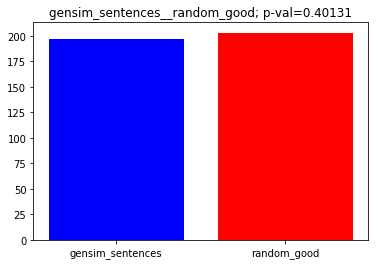

In [7]:
pairs = df[df.golden.isna()].groupby(
        by=['algs'], 
    )
for pair in pairs:
    algs = pair[1].algs.iloc[0]
    cnts = pair[1].groupby(by='chosen_alg')['pool_id'].count()
    pval = find_p_val(*cnts)
    plt.bar(cnts.index, cnts, color=['b', 'r'])
    plt.title(f'{algs}; p-val={pval:.5f}')
    plt.show()

### распределение ответов по письмам

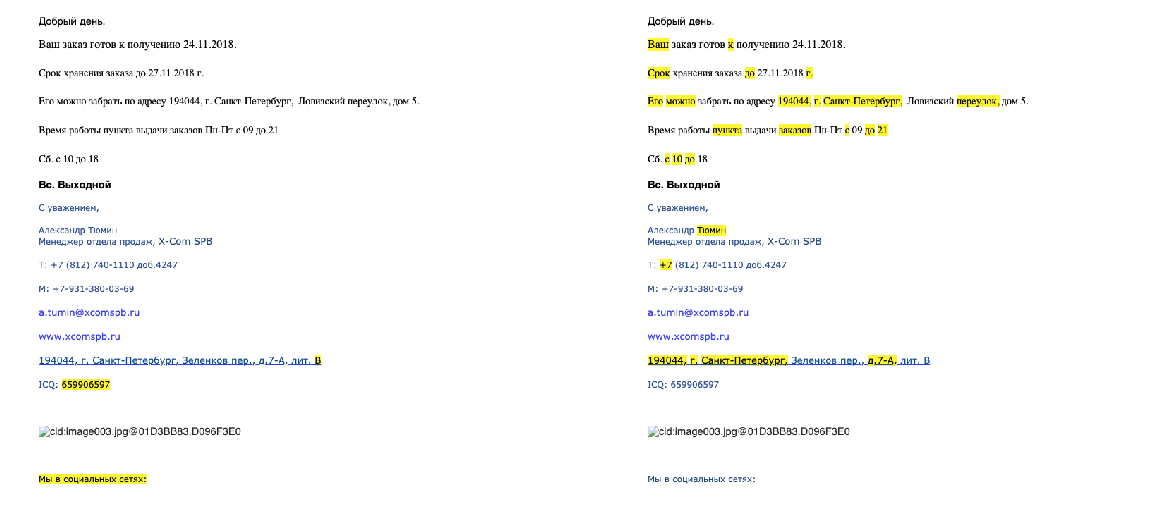

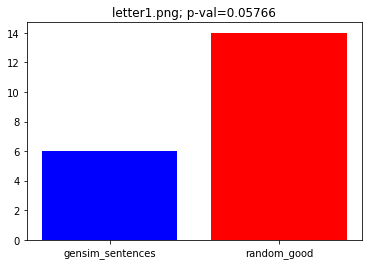

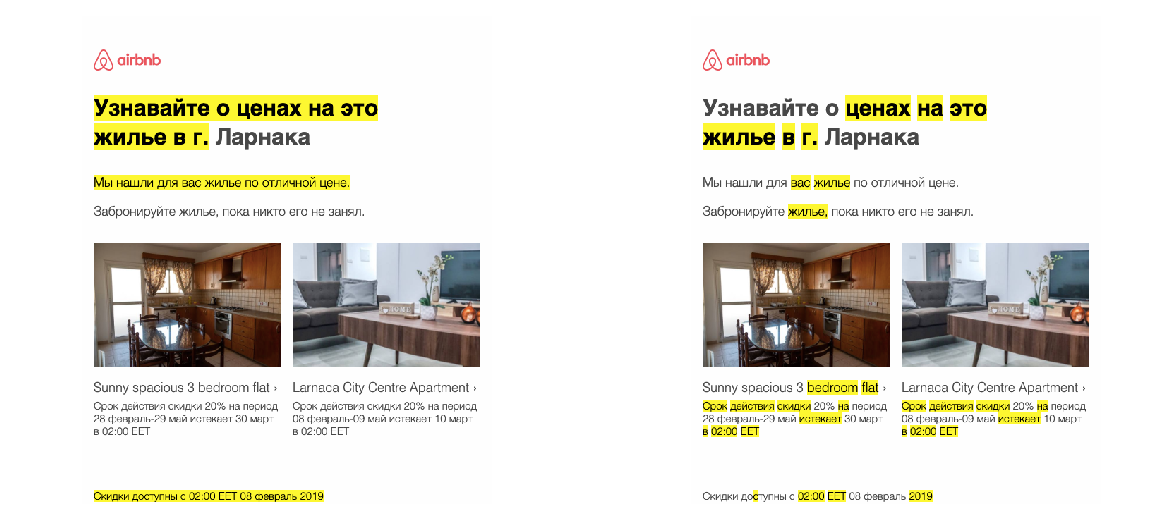

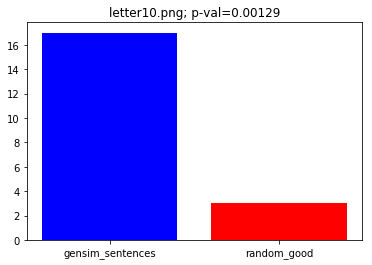

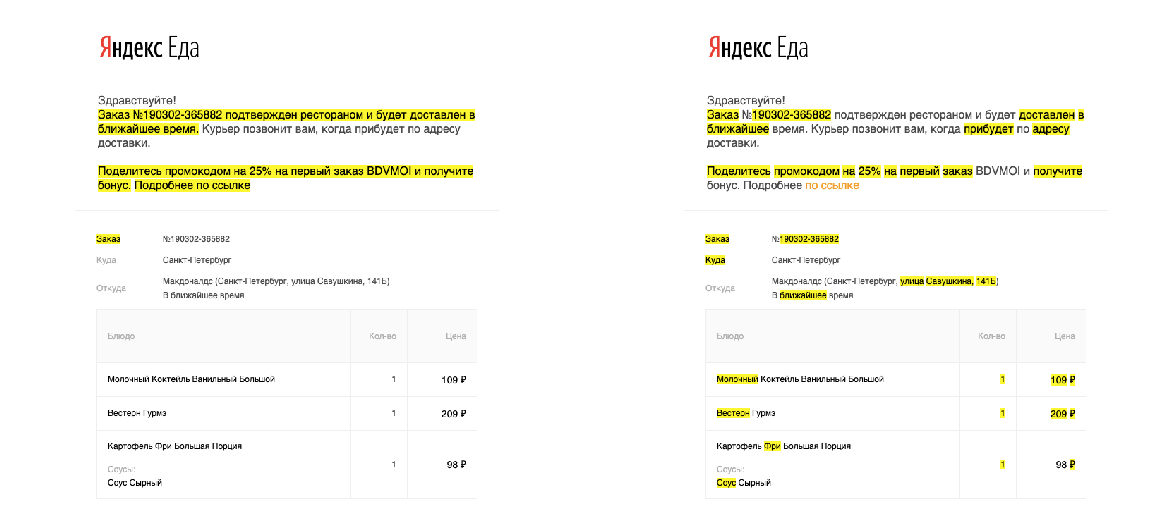

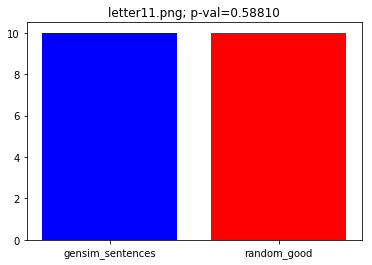

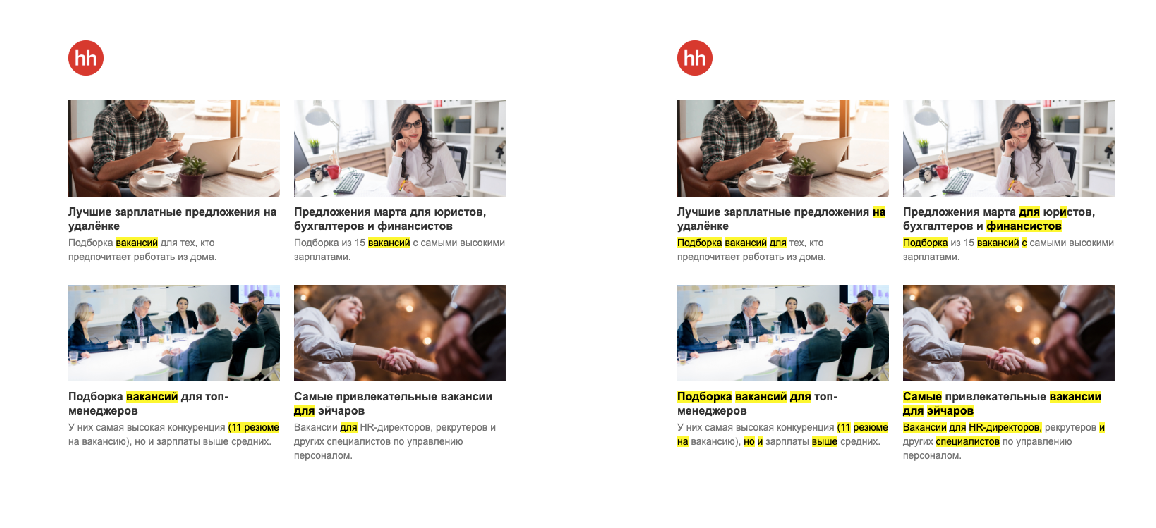

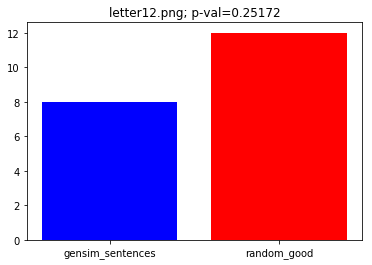

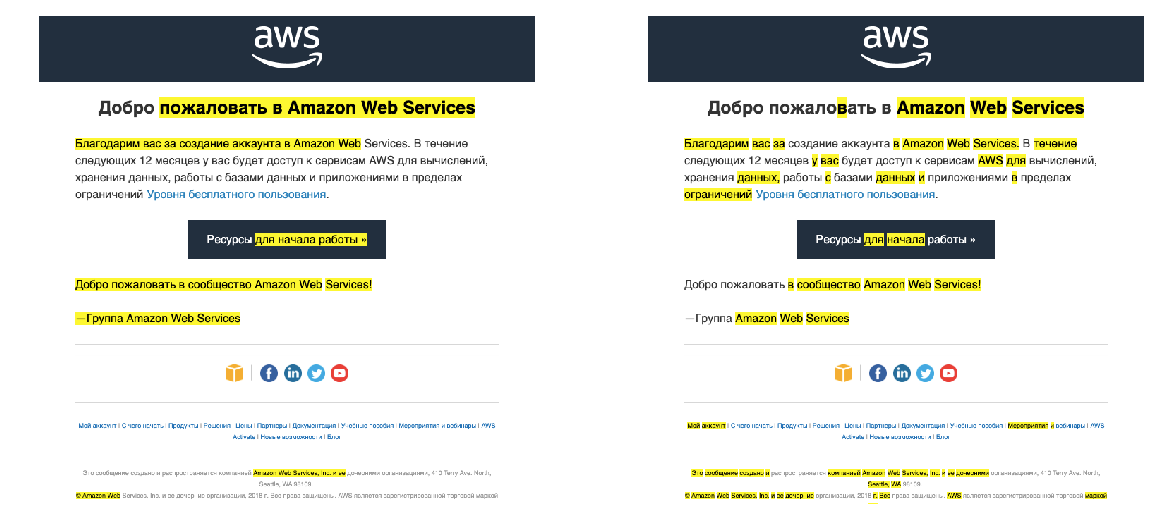

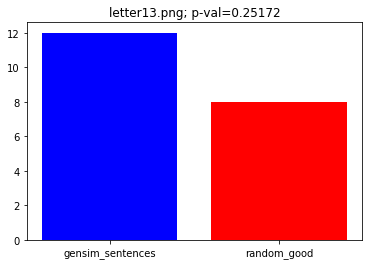

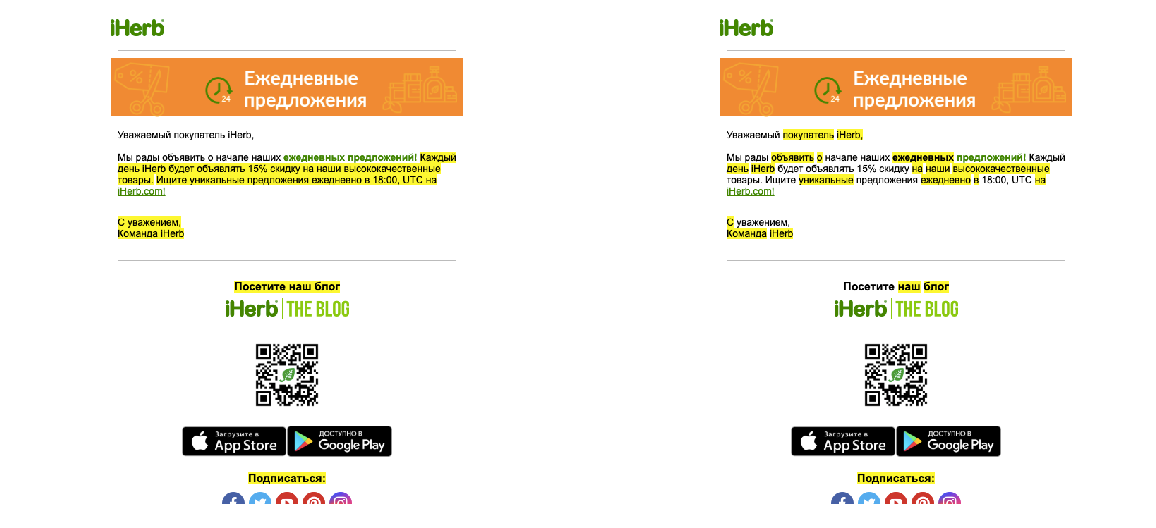

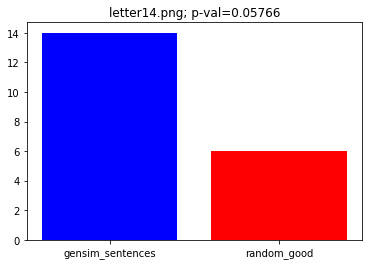

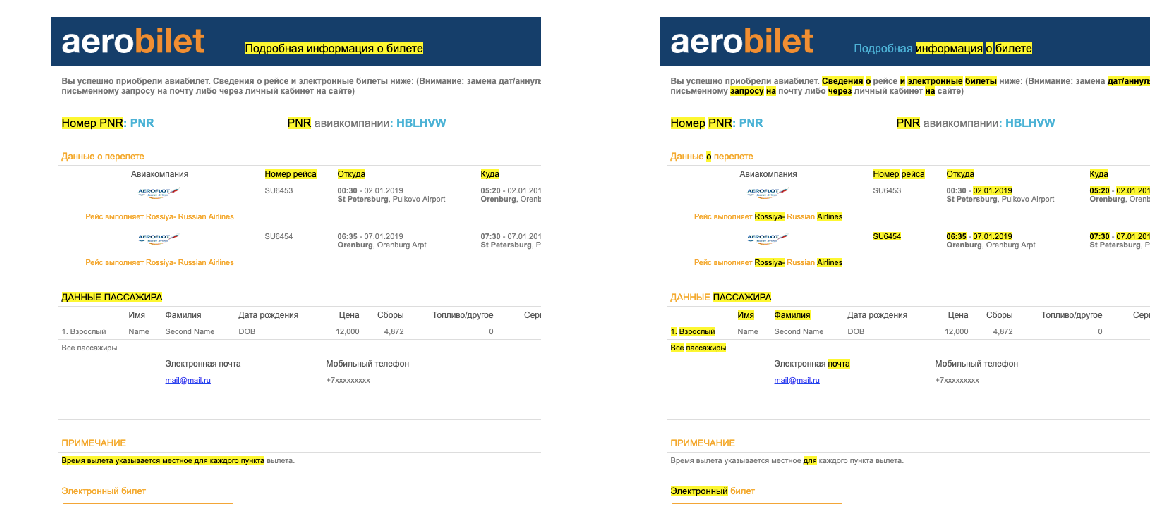

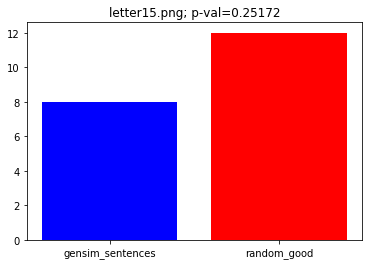

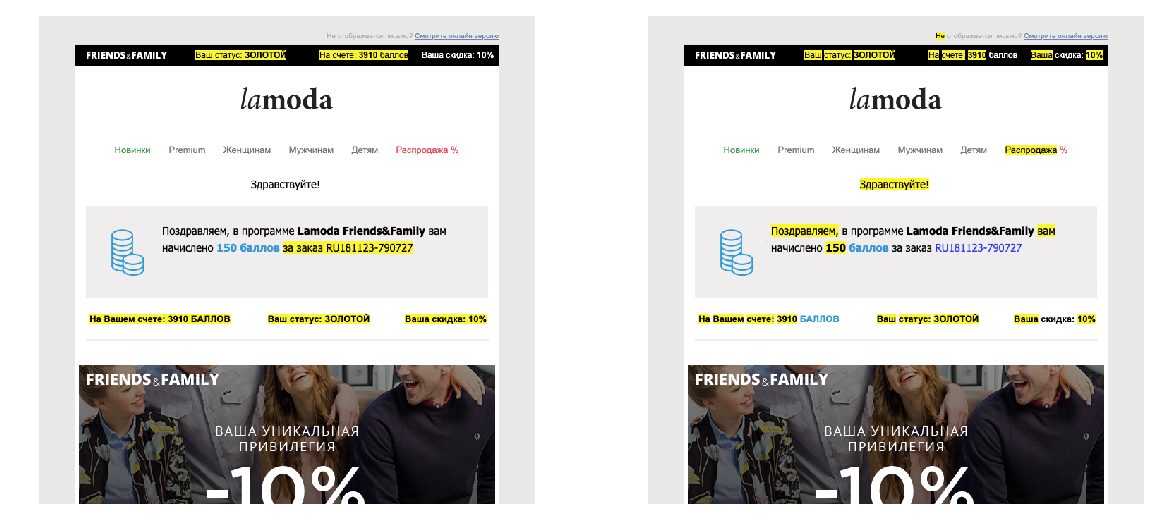

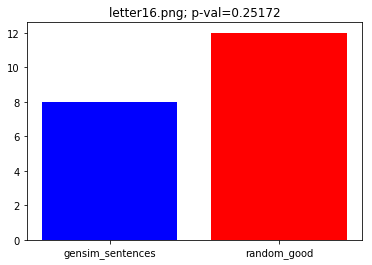

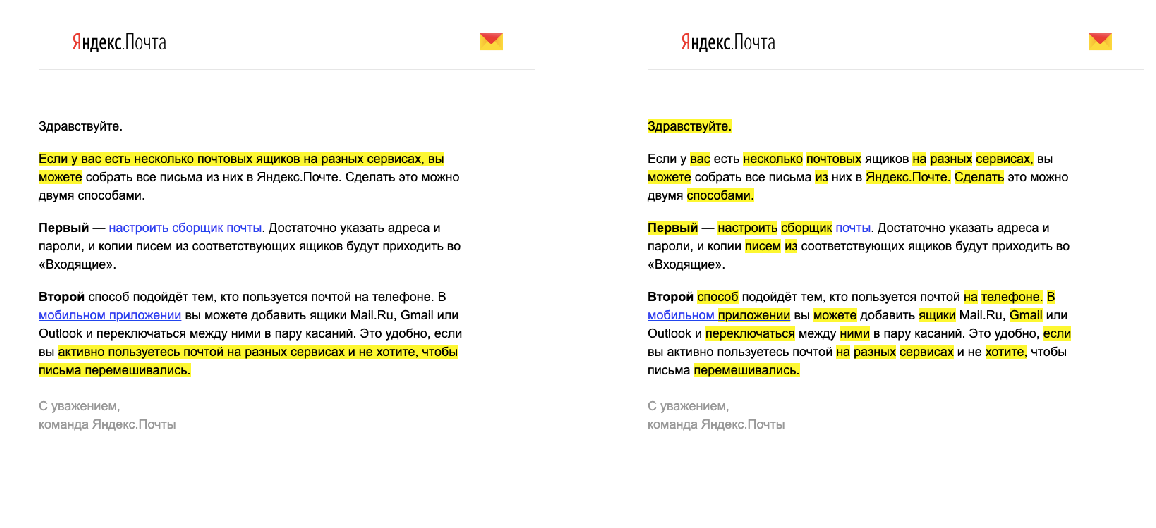

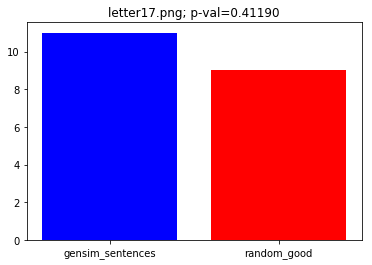

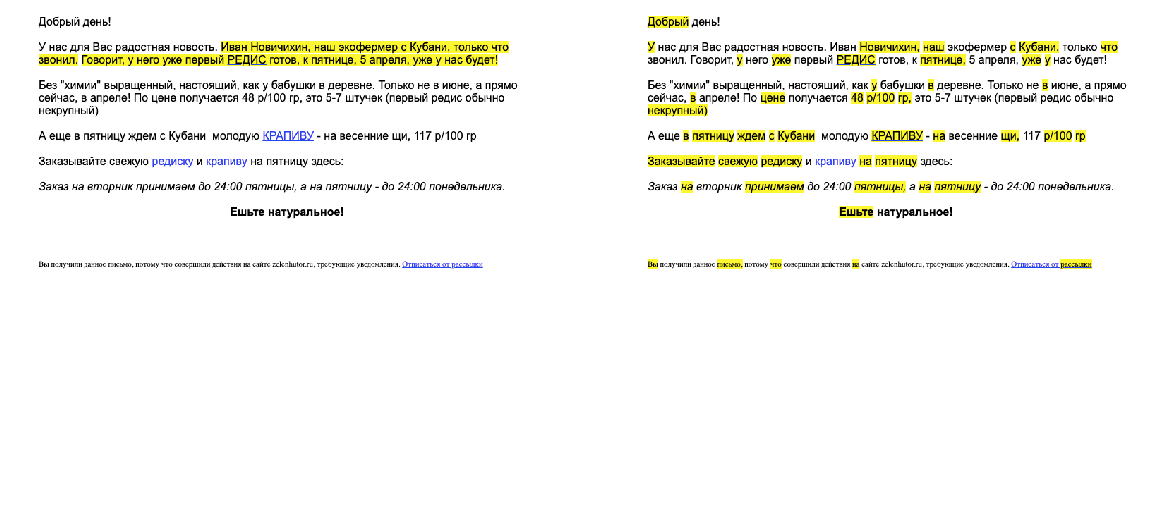

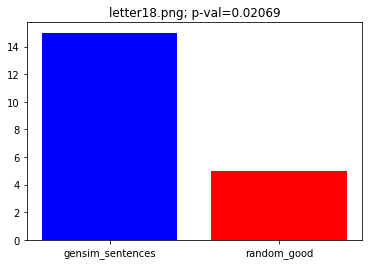

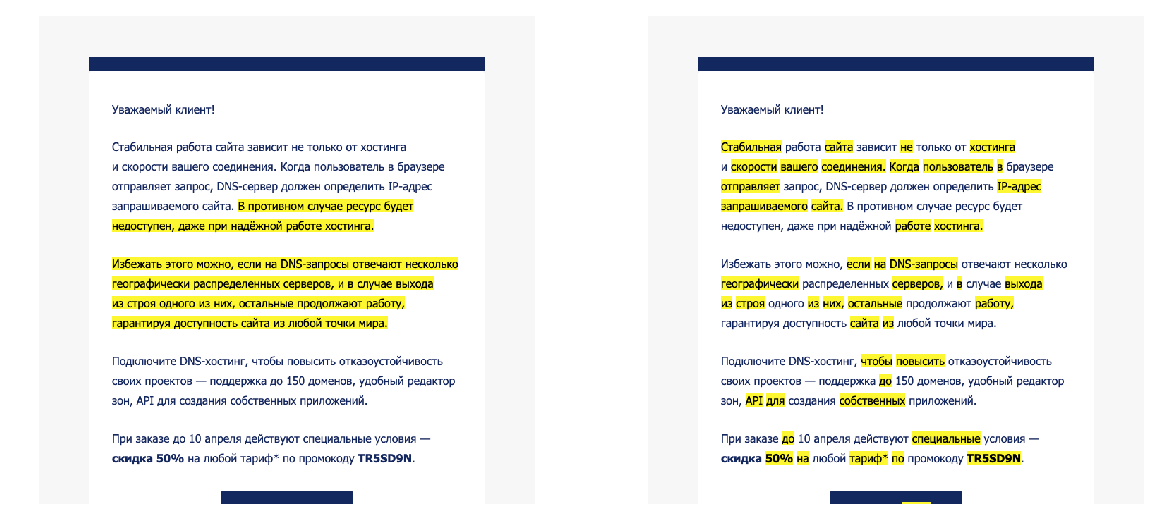

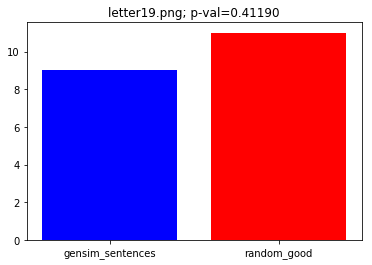

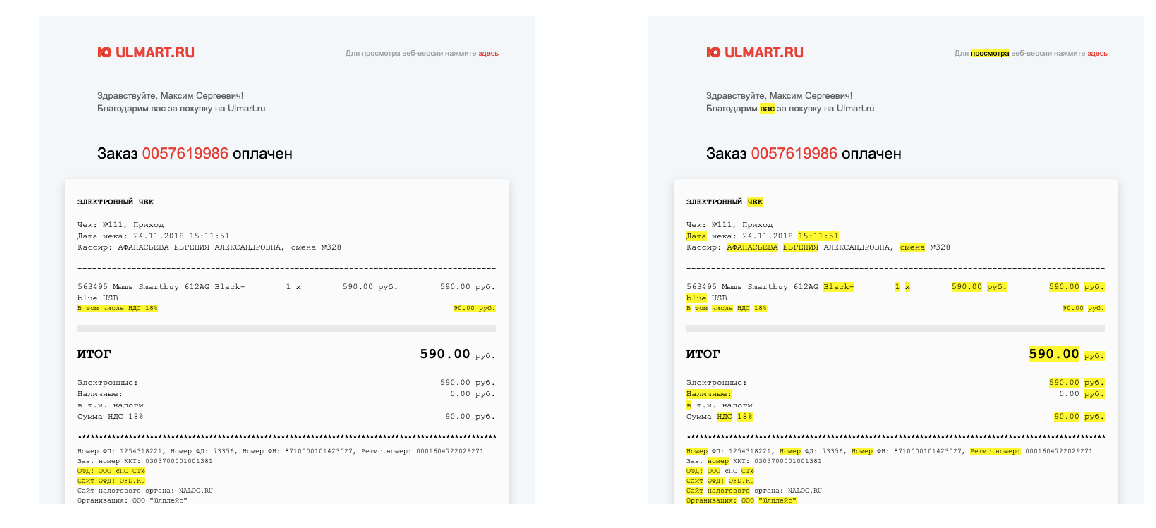

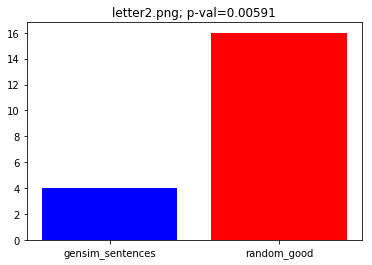

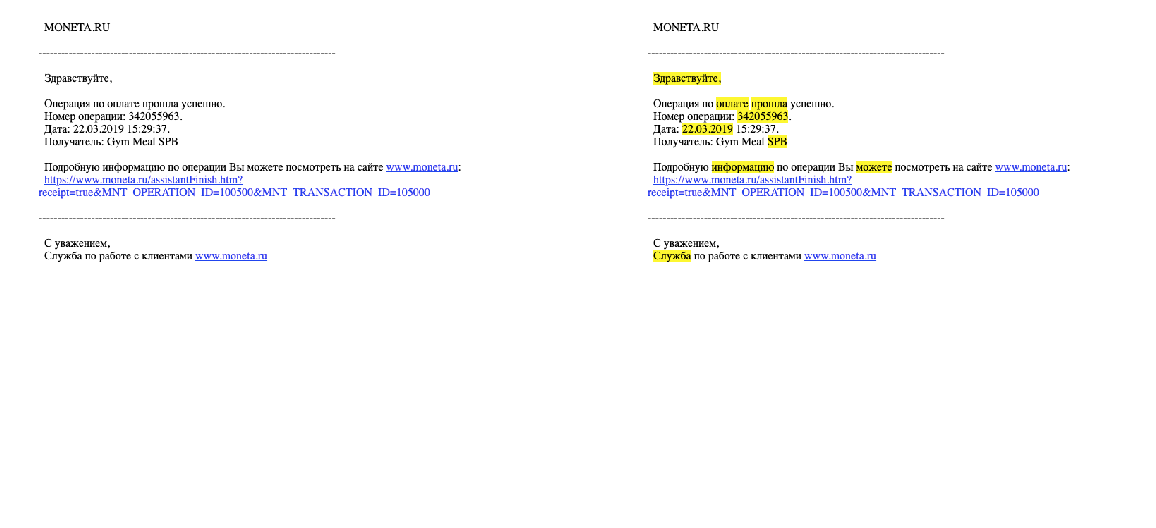

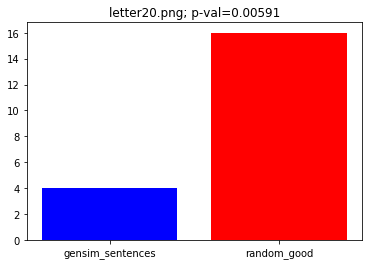

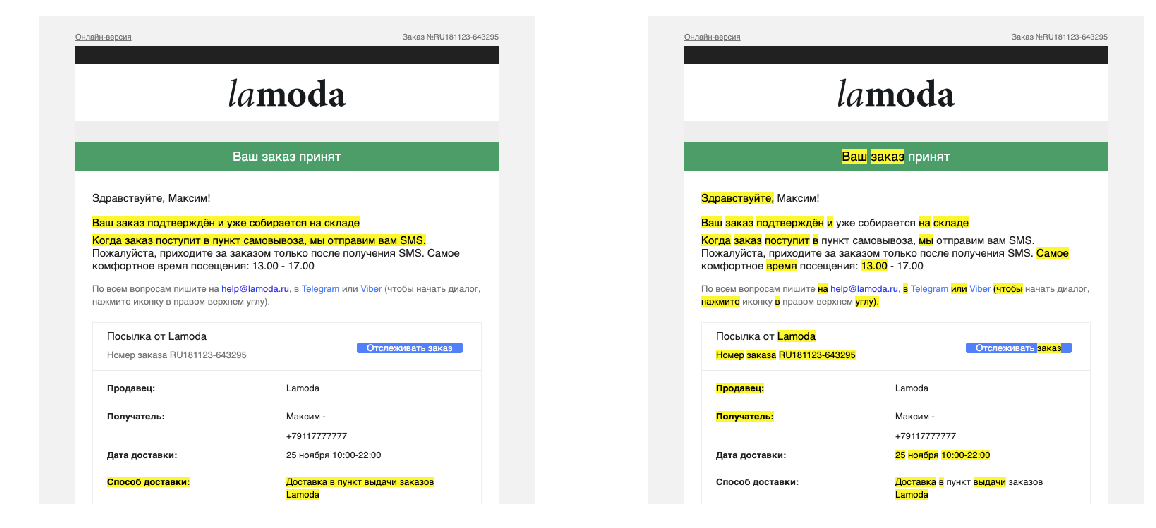

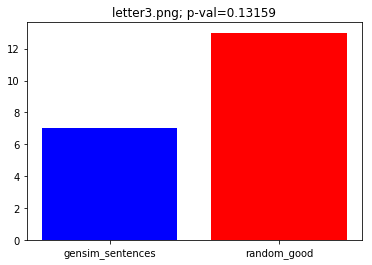

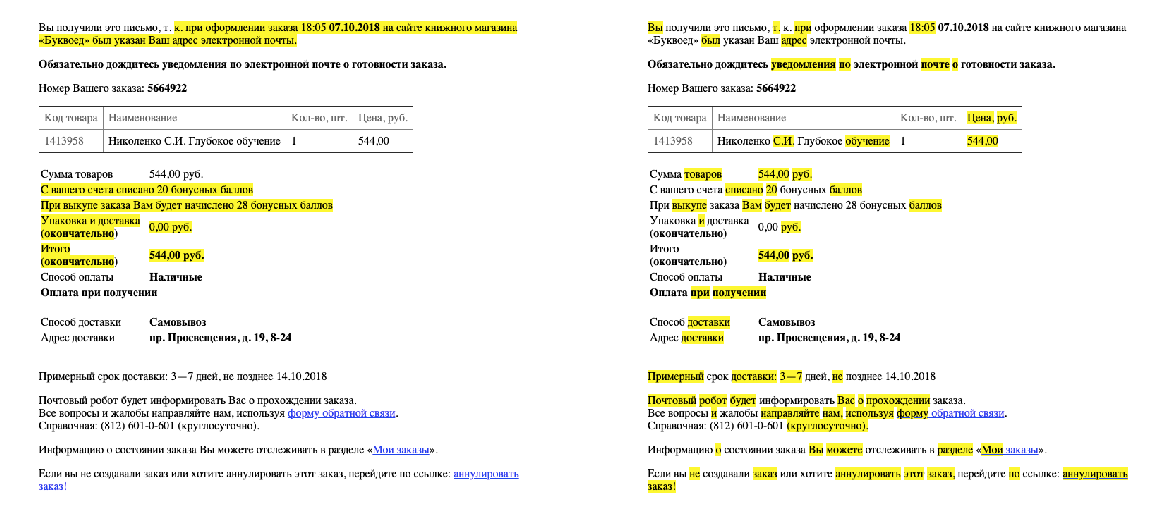

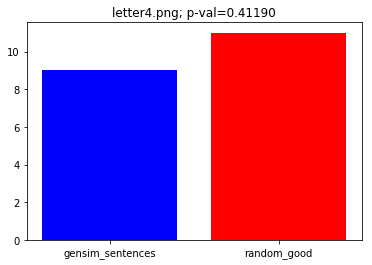

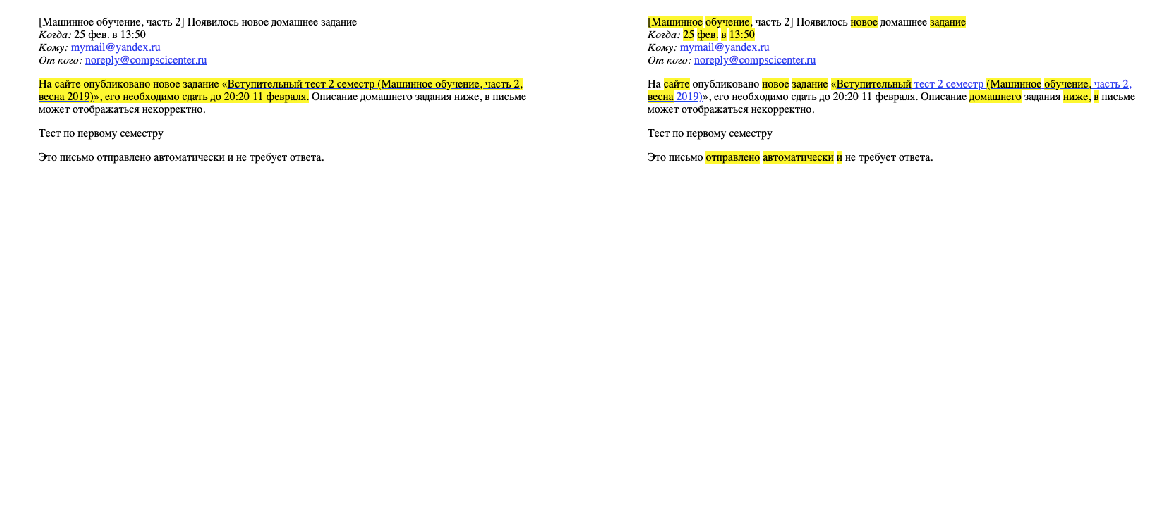

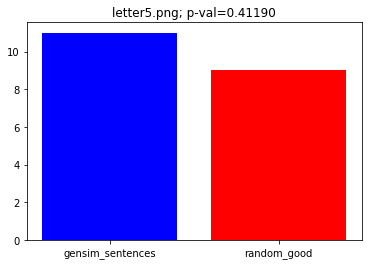

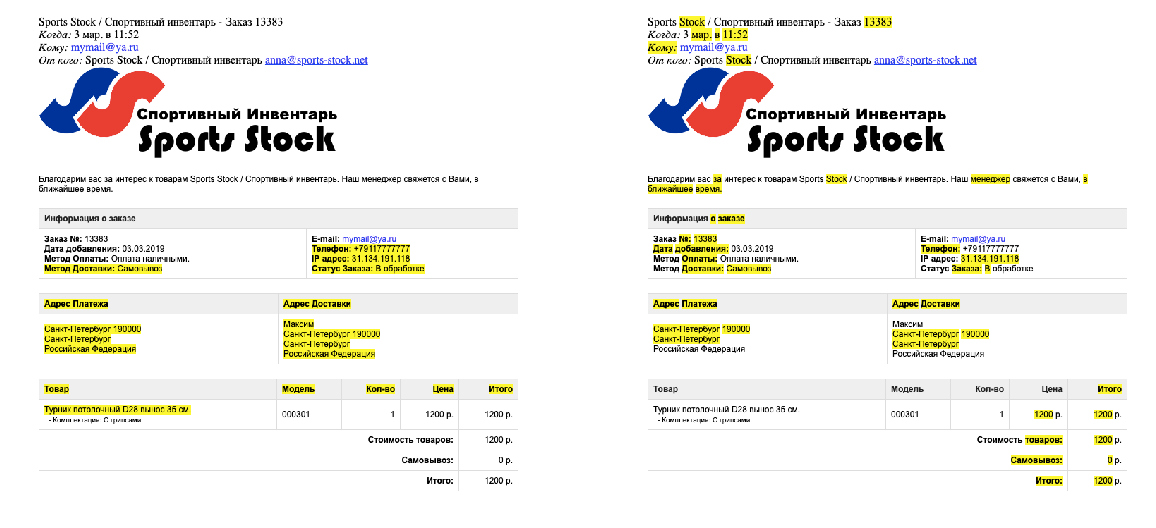

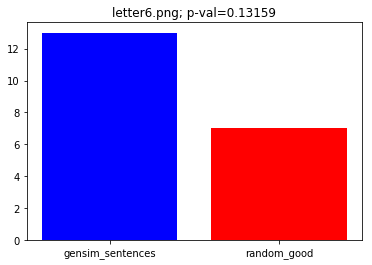

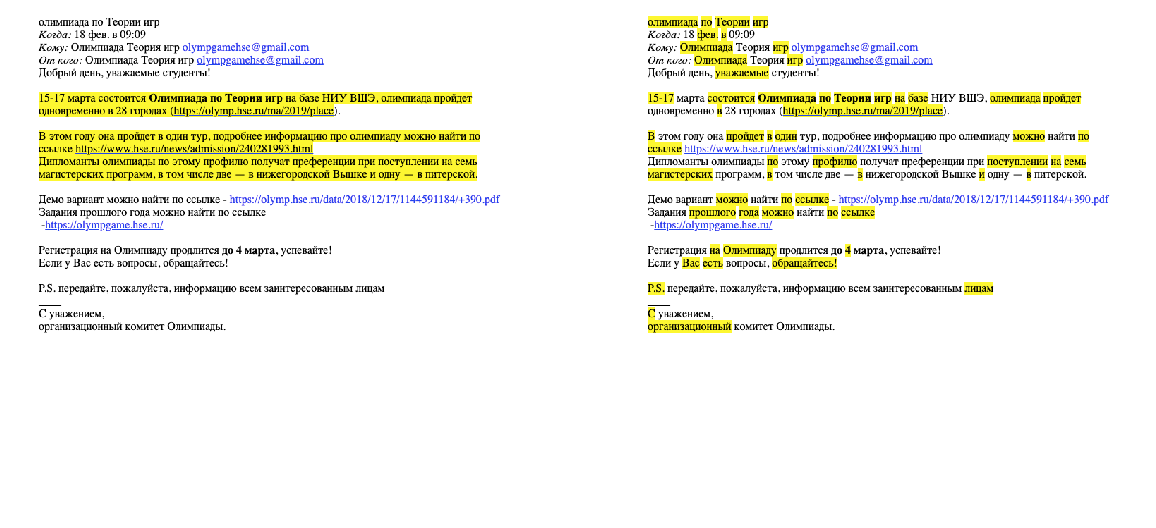

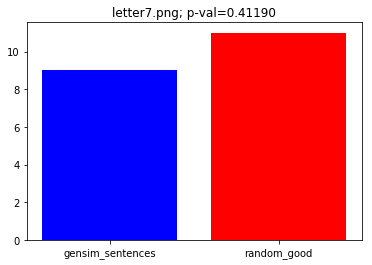

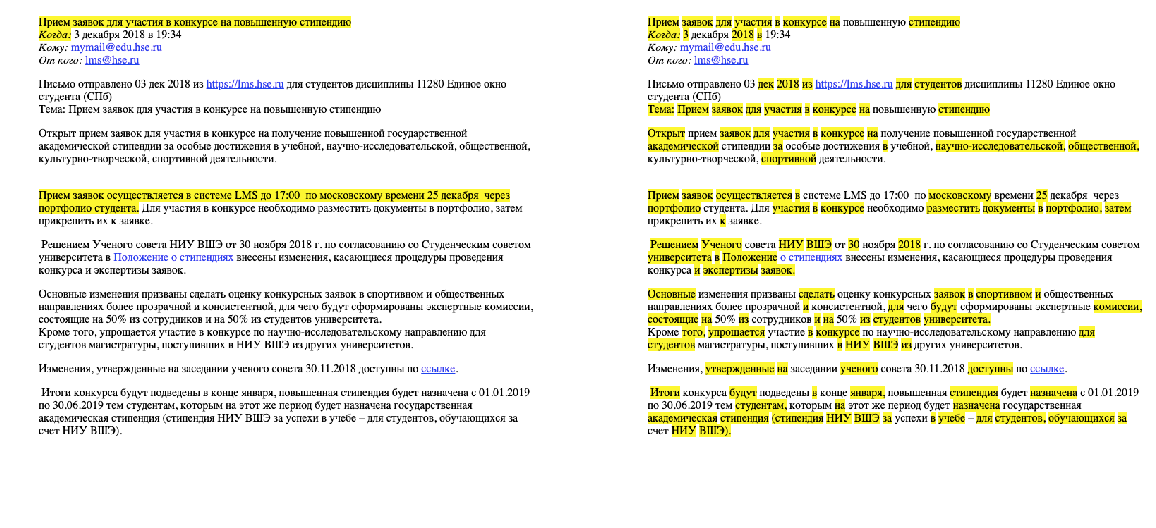

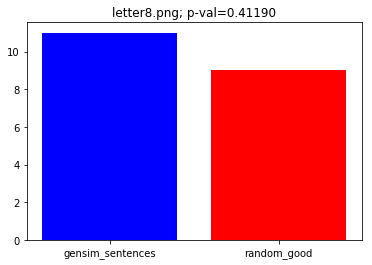

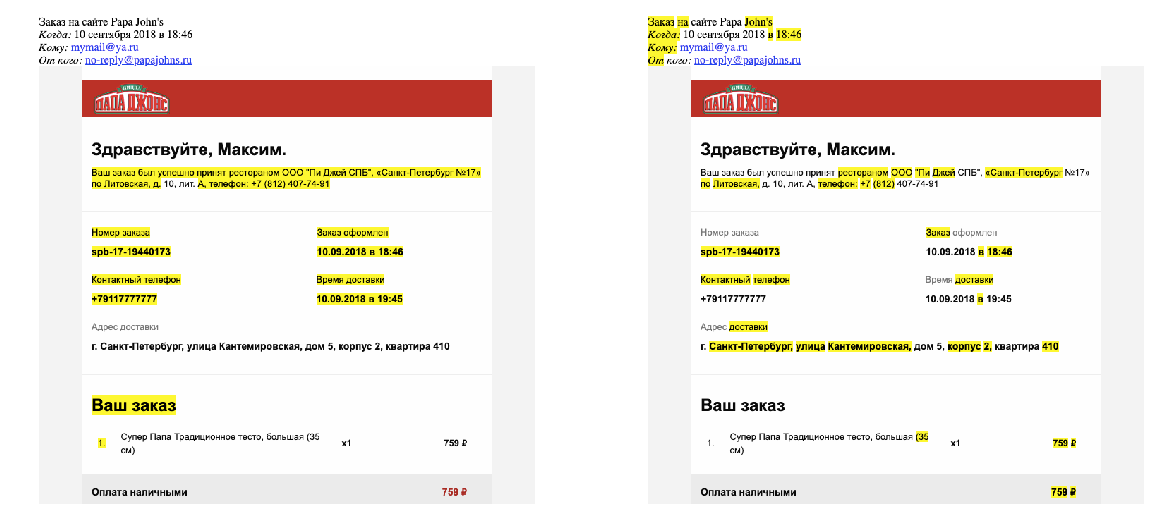

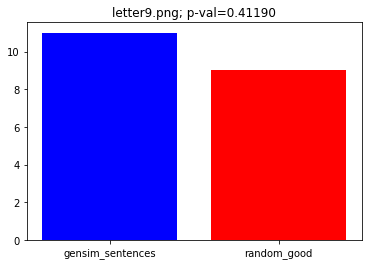

In [8]:
root_folder = '../screenshot_emails'
for pair in pairs:
    algs = pair[1].algs.iloc[0]
    algnames = algs.split('__')
    for task in pair[1].groupby(by='task'):
        taskname = task[1].task.iloc[0]
        paths = ['/'.join([root_folder, algname, taskname]) for algname in algnames]
        imgs = [mpimg.imread(path) for path in paths]
        plt.figure(figsize=(20, 10))
        for i, img in enumerate(imgs):
            plt.subplot(1, len(imgs), i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()
        cnts = task[1].groupby(by='chosen_alg')['pool_id'].count()
        pval = find_p_val(*cnts)
        plt.bar(cnts.index, cnts, color=['b', 'r'])
        plt.title(f'{taskname}; p-val={pval:.5f}')
        plt.show()

## теперь то же самое для тех, кто долго думал

In [9]:
df['time_taken'] = pd.to_datetime(df.submitted) - pd.to_datetime(df.created)

longer_than_median = df['time_taken'] > df['time_taken'].median()

### общее распределение ответов

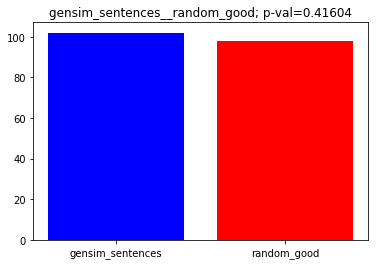

In [10]:
pairs = df[(df.golden.isna()) & longer_than_median].groupby(
        by=['algs'], 
    )
for pair in pairs:
    algs = pair[1].algs.iloc[0]
    cnts = pair[1].groupby(by='chosen_alg')['pool_id'].count()
    pval = find_p_val(*cnts)
    plt.bar(cnts.index, cnts, color=['b', 'r'])
    plt.title(f'{algs}; p-val={pval:.5f}')
    plt.show()

### распределение ответов по письмам

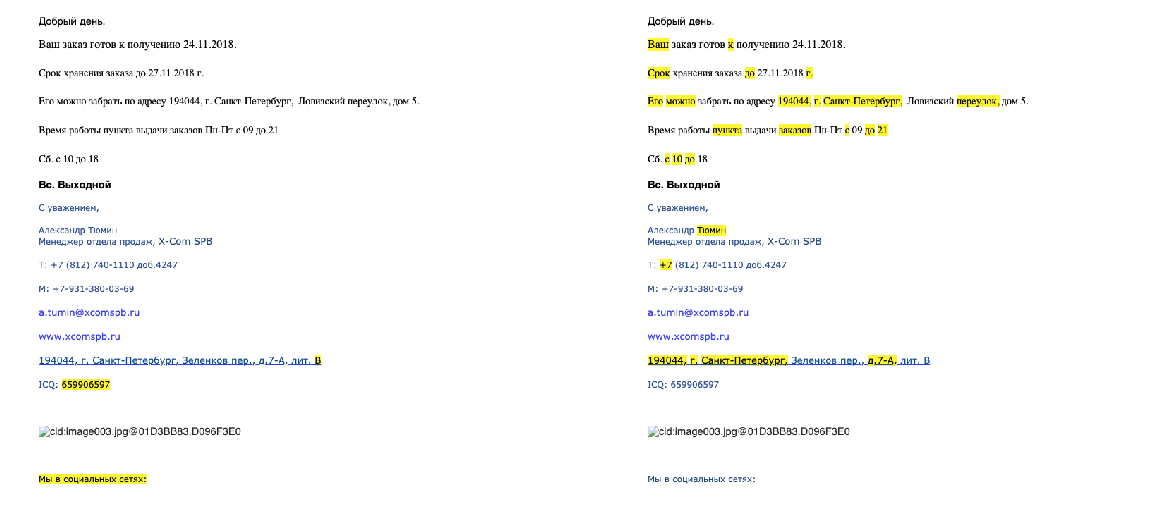

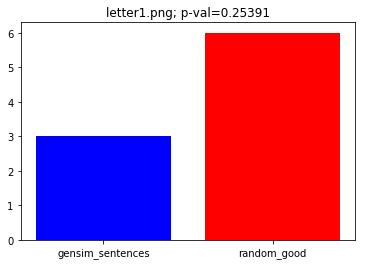

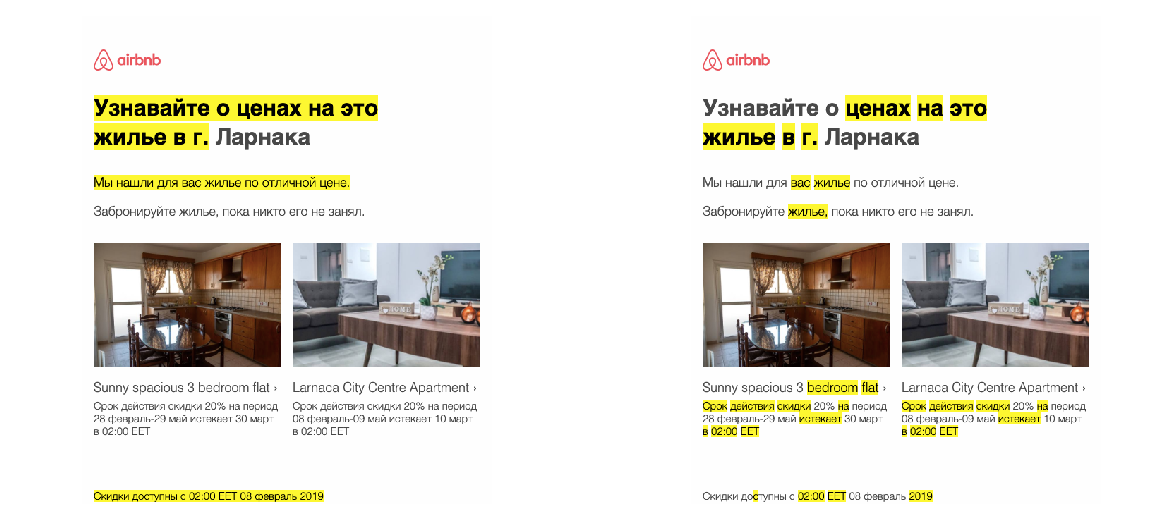

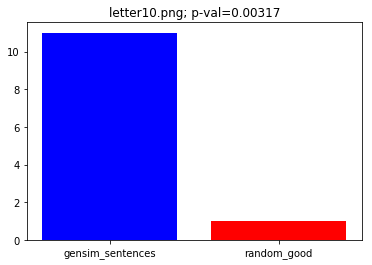

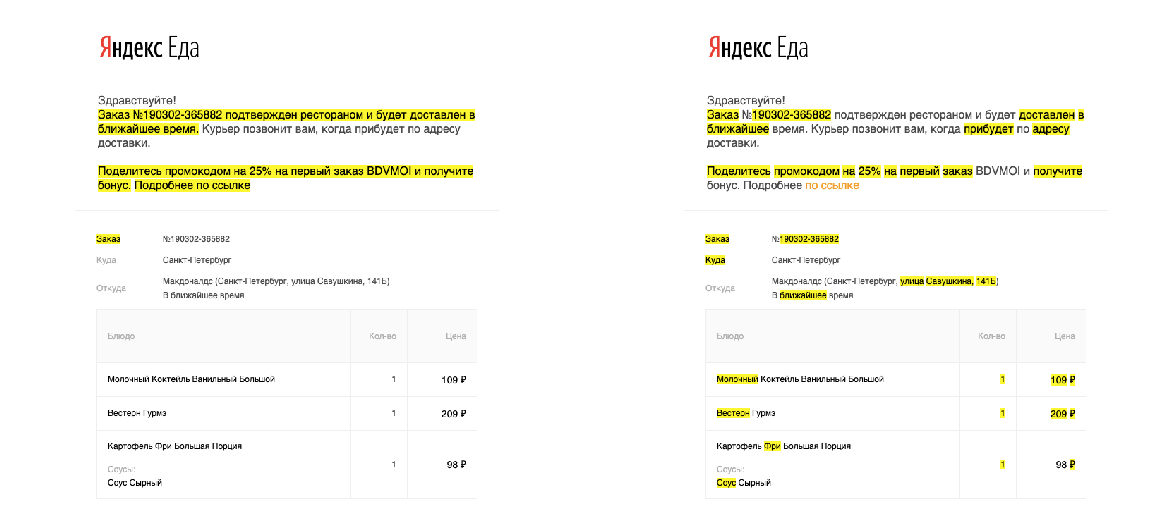

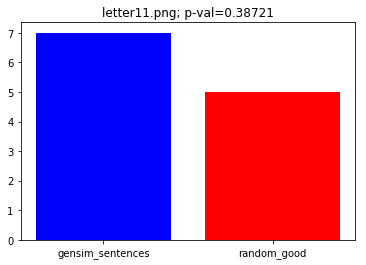

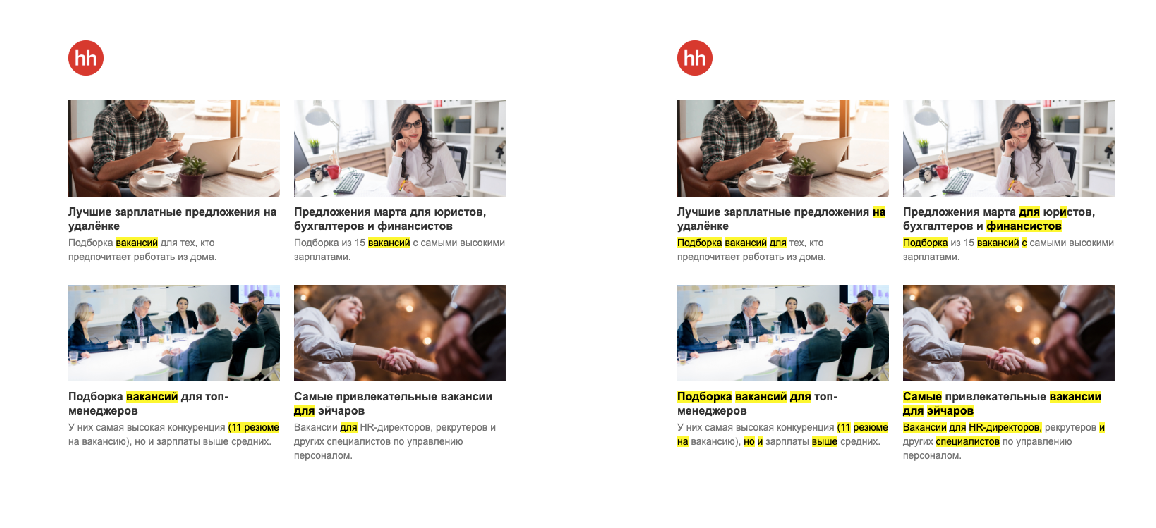

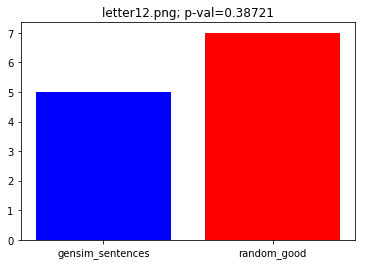

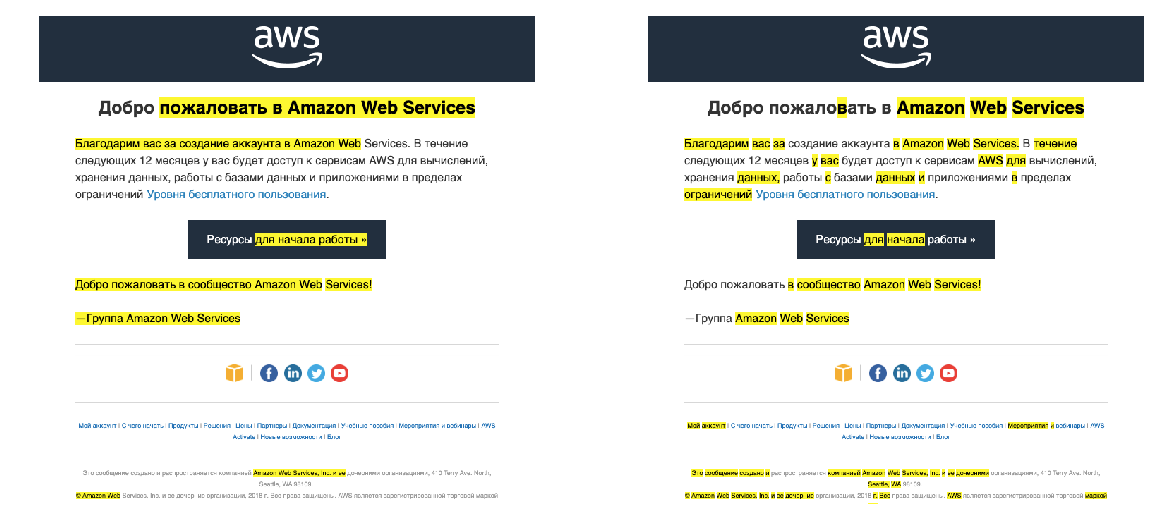

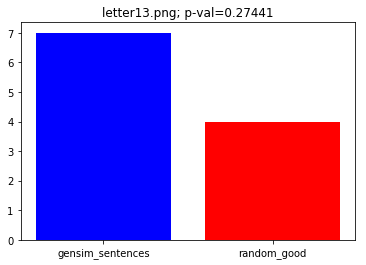

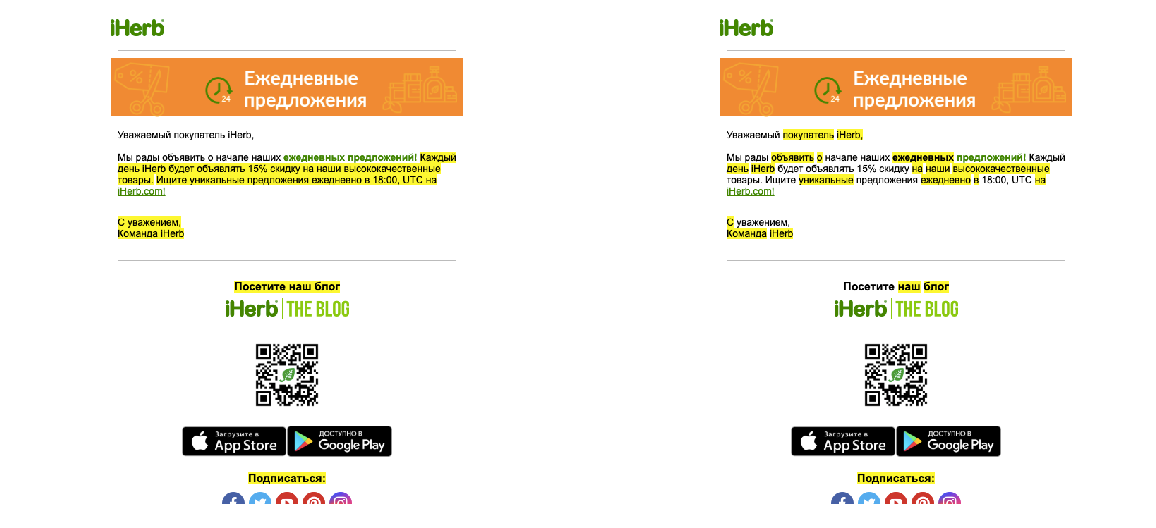

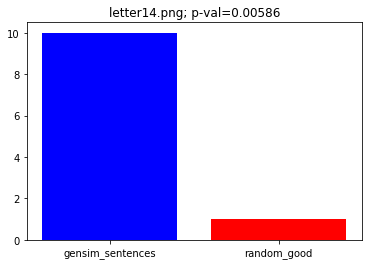

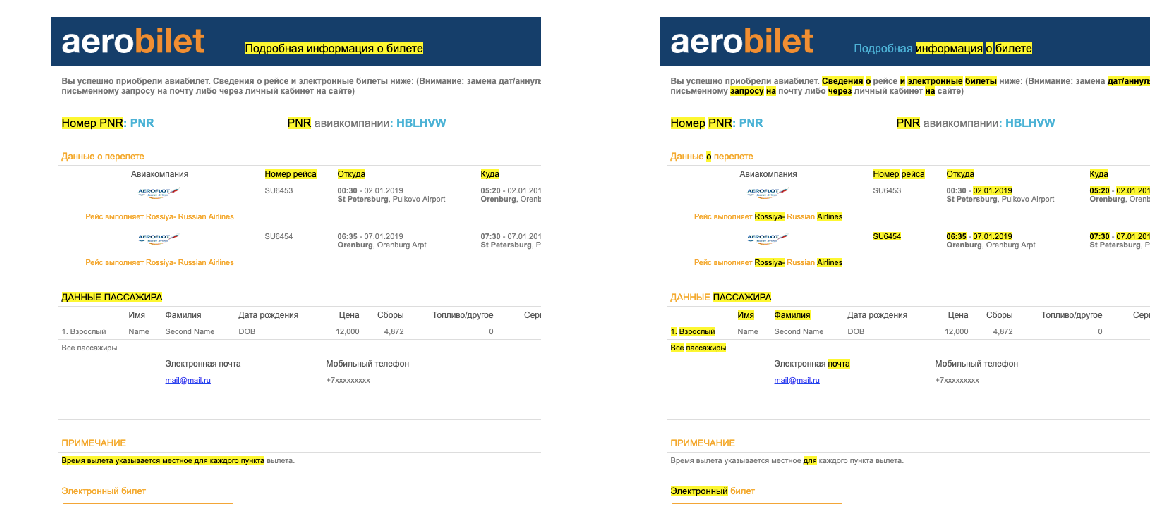

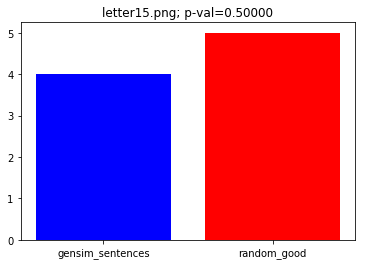

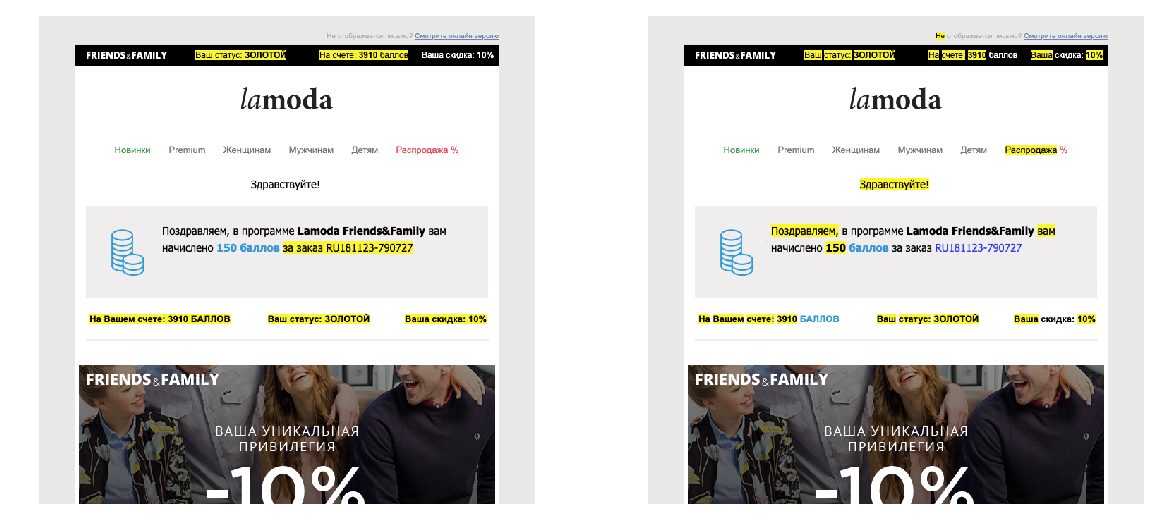

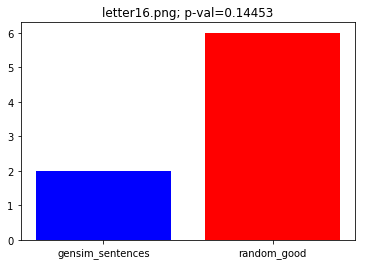

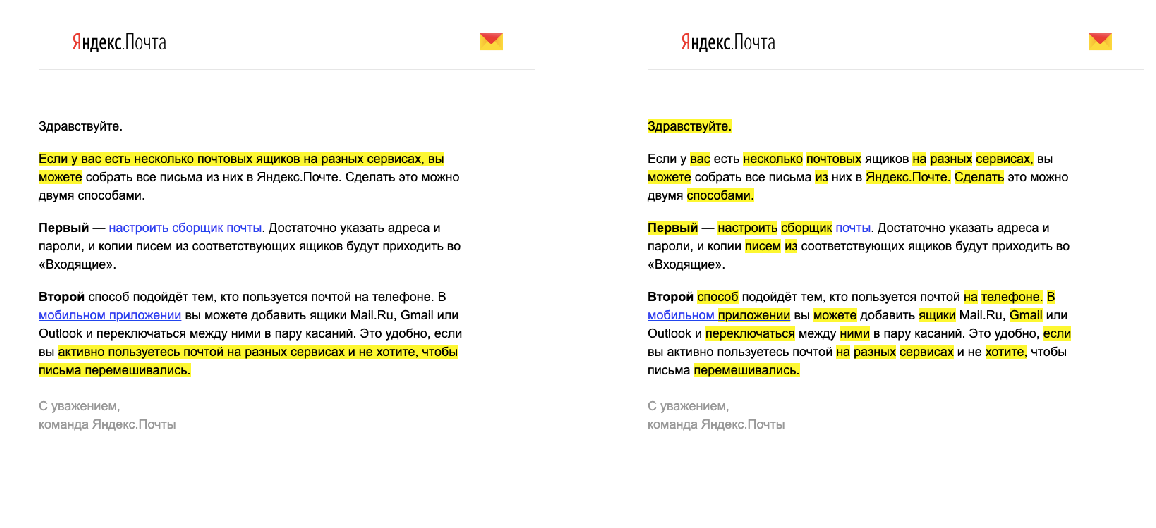

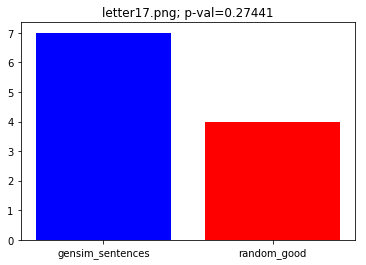

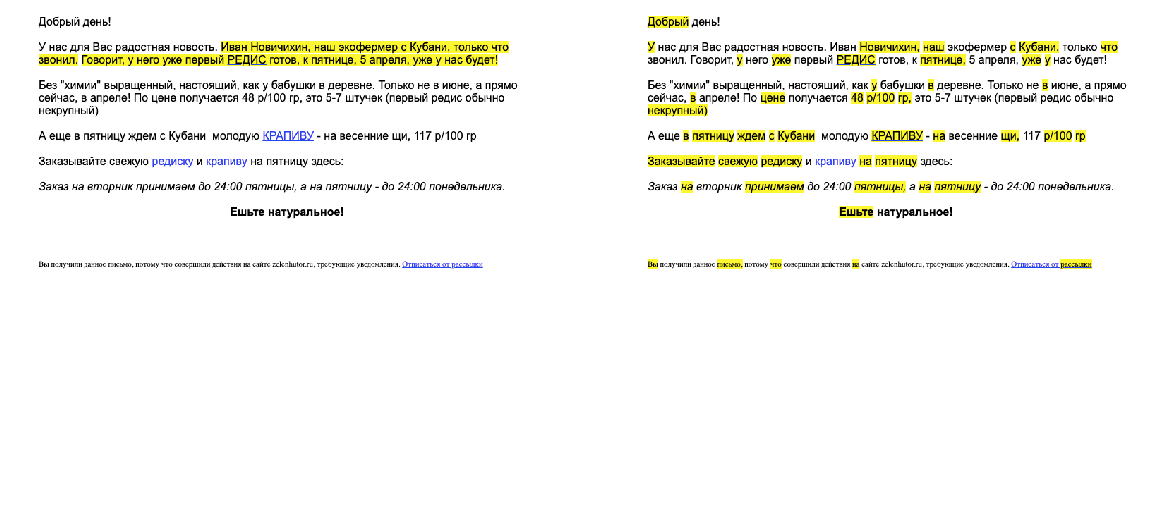

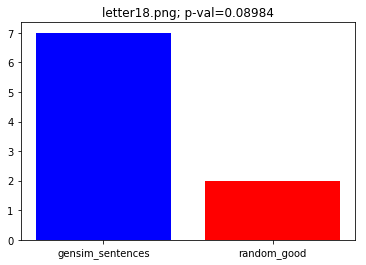

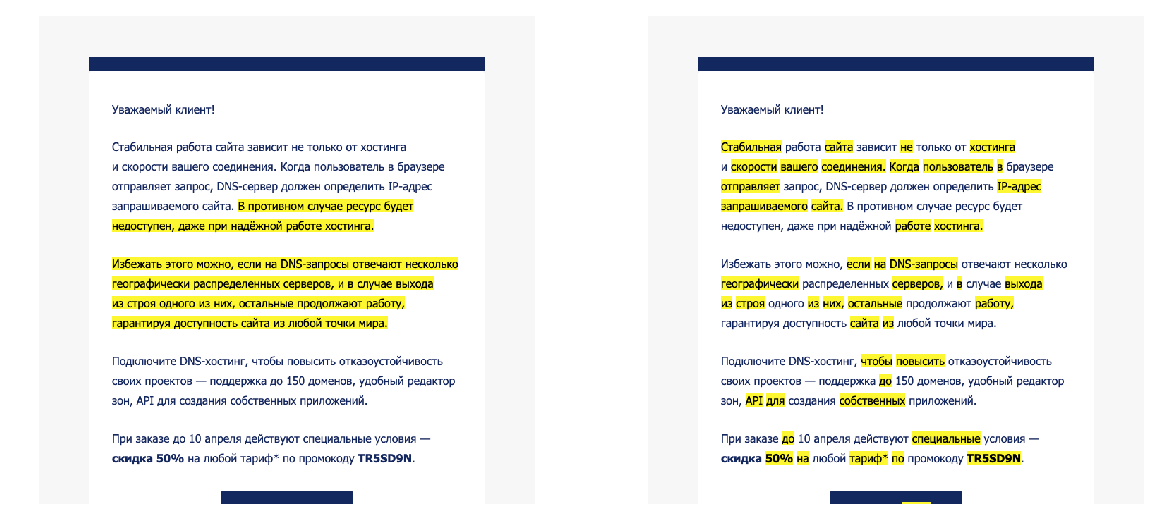

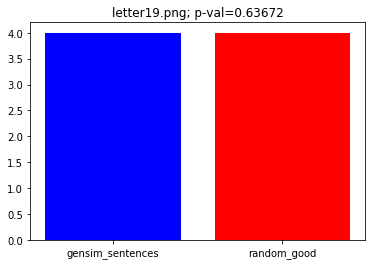

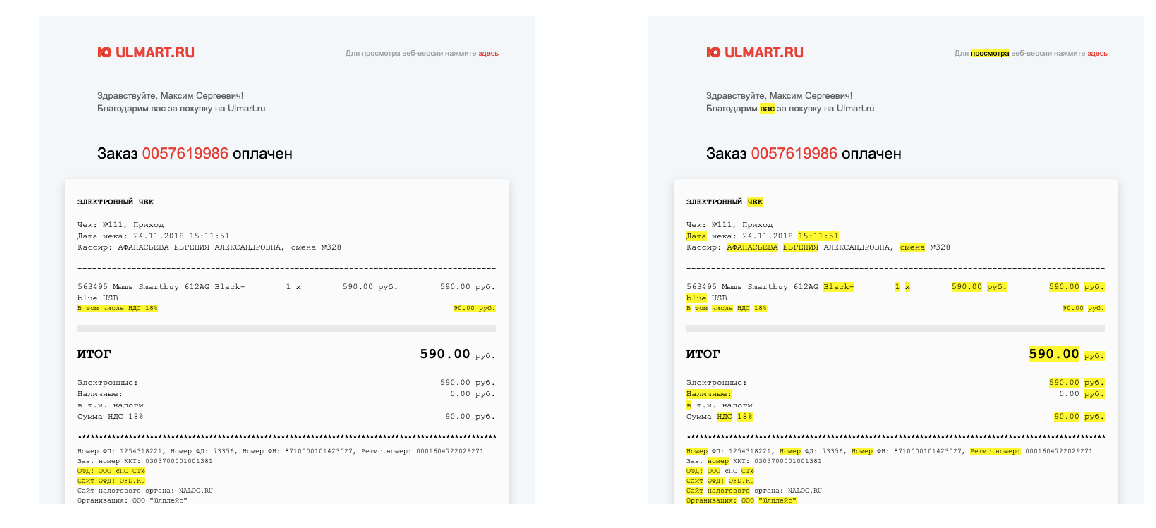

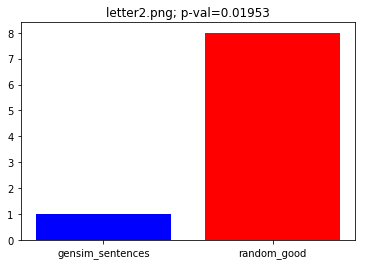

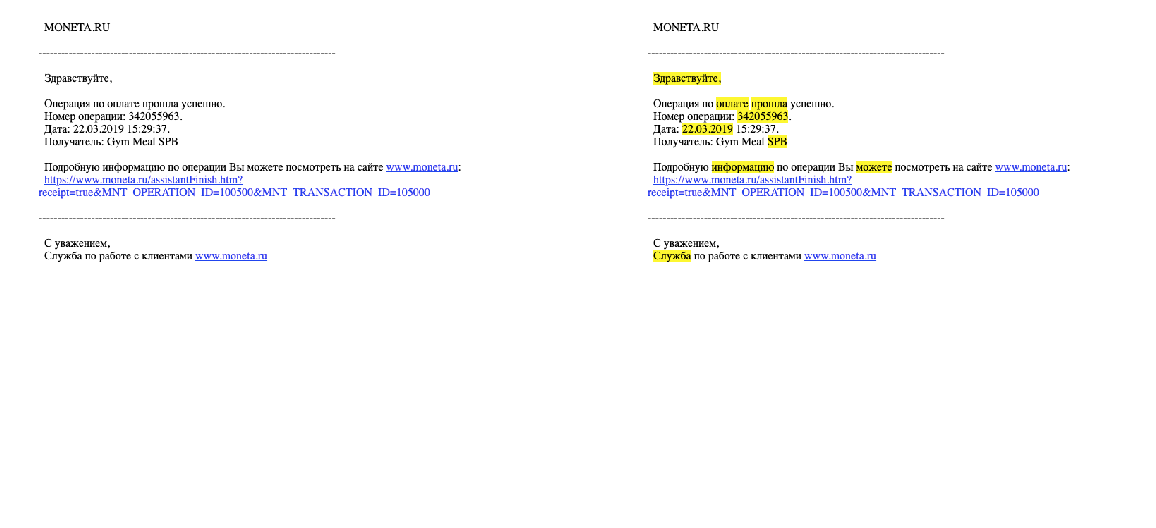

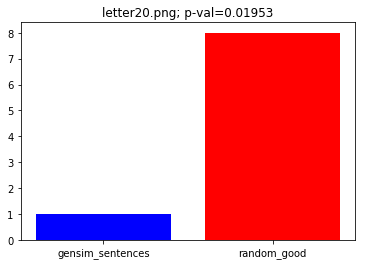

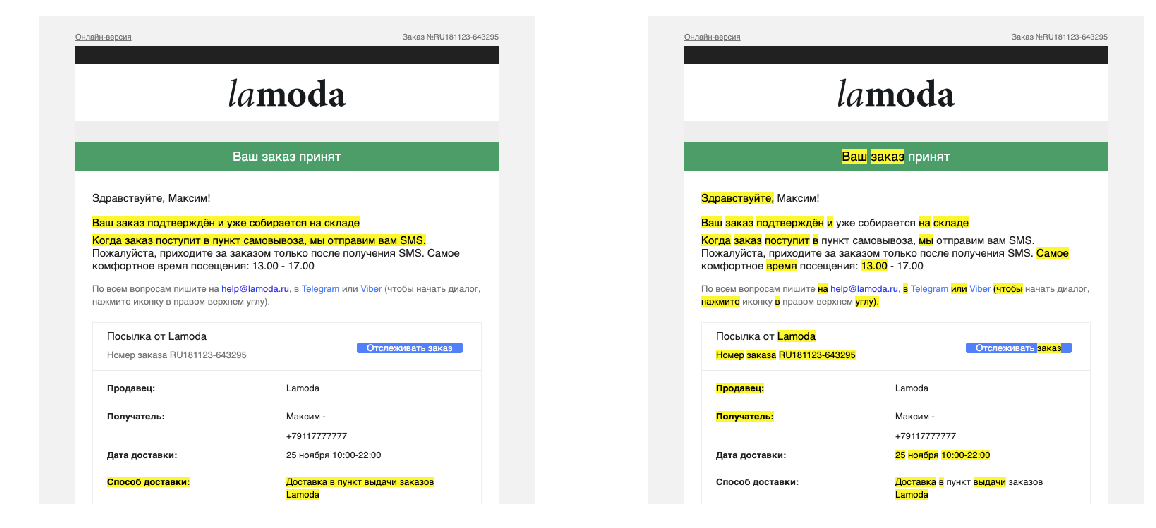

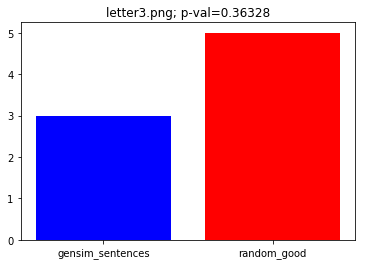

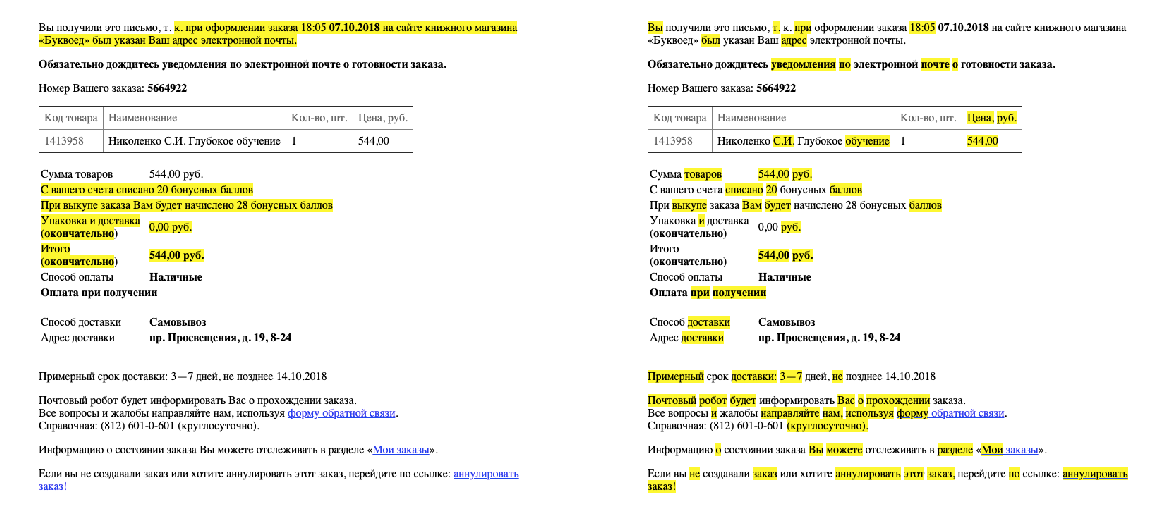

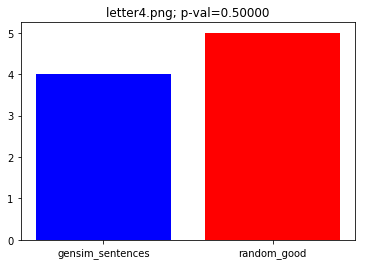

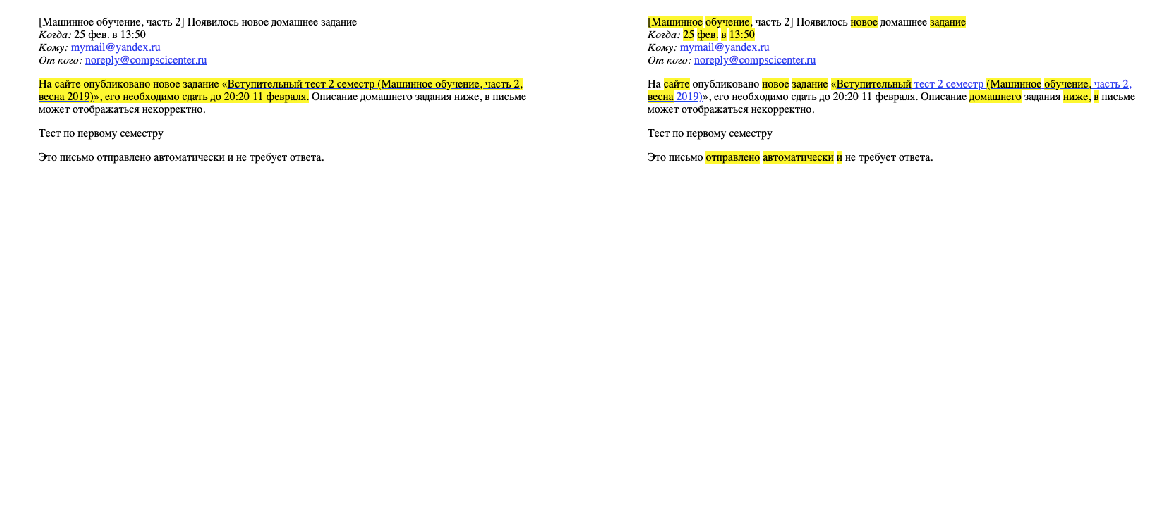

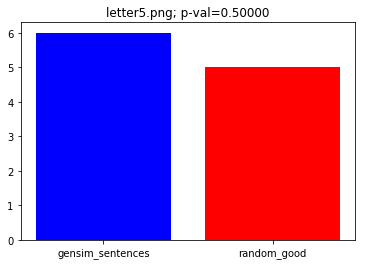

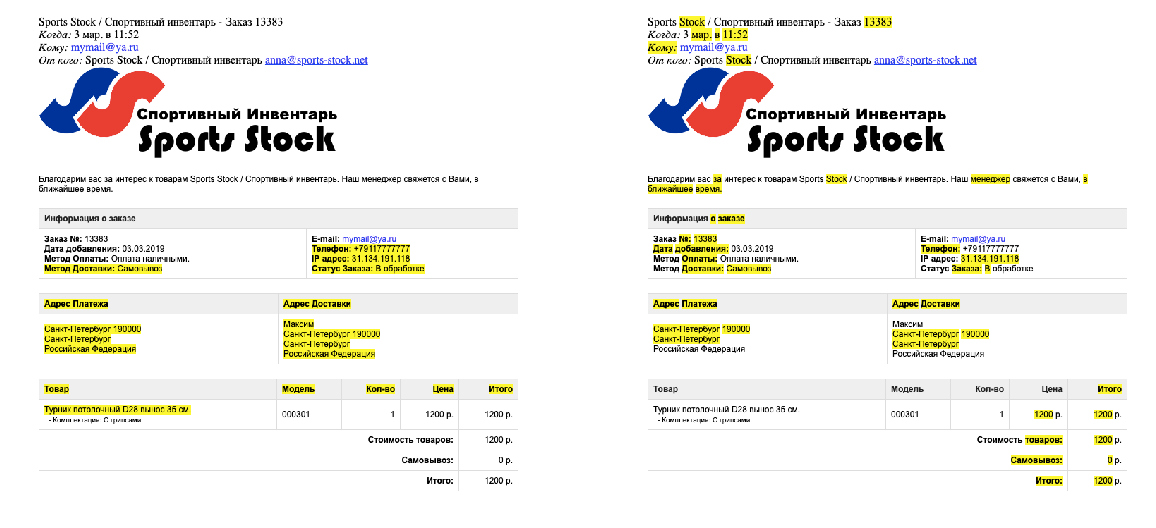

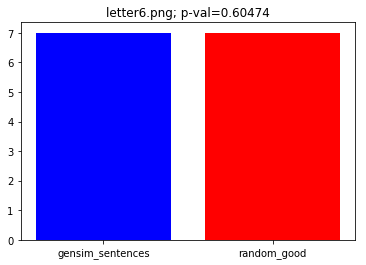

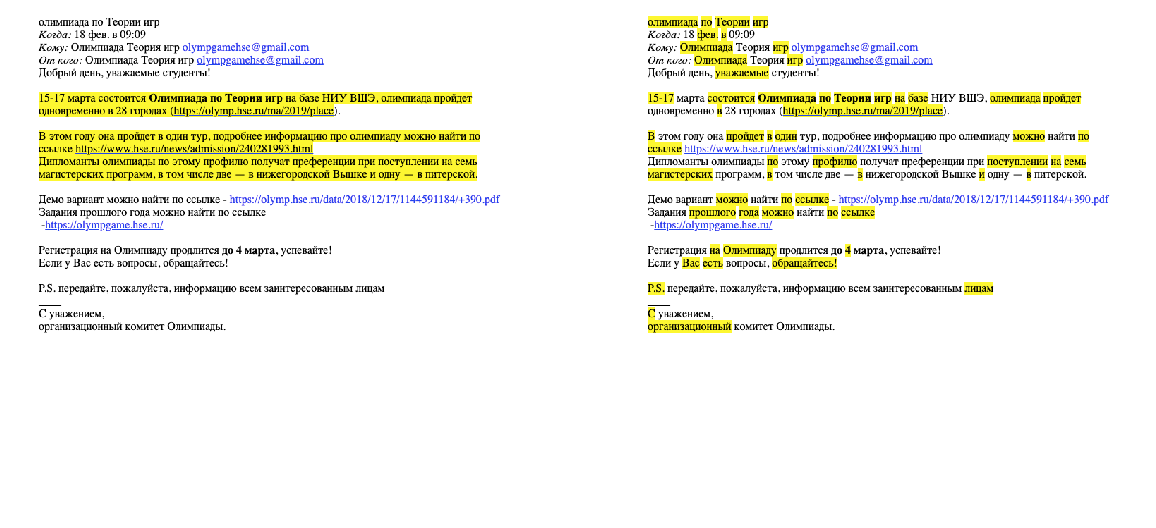

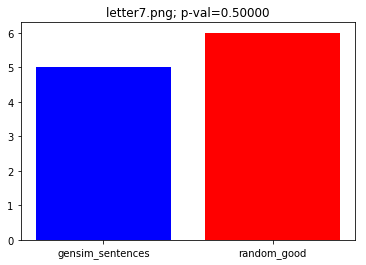

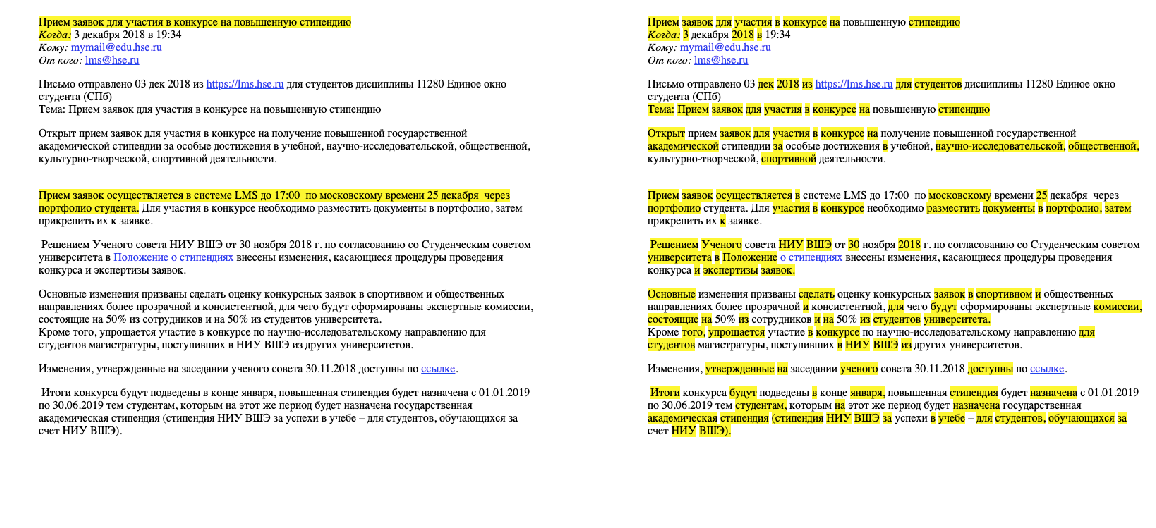

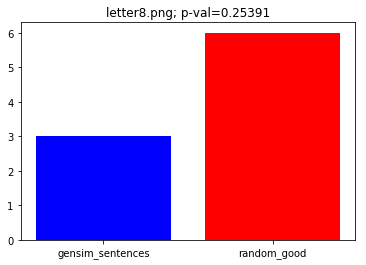

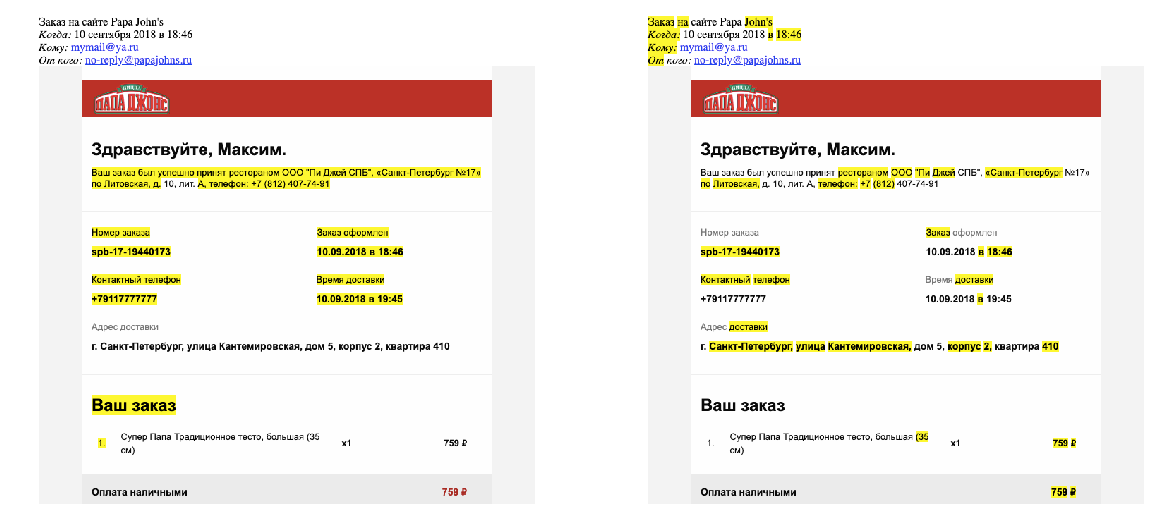

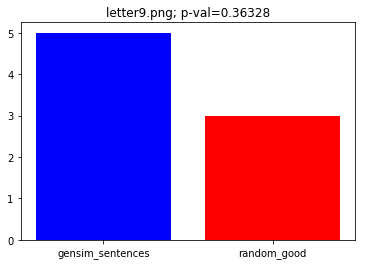

In [11]:
root_folder = '../screenshot_emails'
for pair in pairs:
    algs = pair[1].algs.iloc[0]
    algnames = algs.split('__')
    for task in pair[1].groupby(by='task'):
        taskname = task[1].task.iloc[0]
        paths = ['/'.join([root_folder, algname, taskname]) for algname in algnames]
        imgs = [mpimg.imread(path) for path in paths]
        plt.figure(figsize=(20, 10))
        for i, img in enumerate(imgs):
            plt.subplot(1, len(imgs), i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()
        cnts = task[1].groupby(by='chosen_alg')['pool_id'].count()
        pval = find_p_val(*cnts)
        plt.bar(cnts.index, cnts, color=['b', 'r'])
        plt.title(f'{taskname}; p-val={pval:.5f}')
        plt.show()

In [12]:
user_algs_task_aggregation = df[df.golden.isna()].groupby(
    by=['user_id', 'algs', 'task']
)['chosen_alg'].aggregate(['count', 'nunique'])
user_algs_task_aggregation = df[df.golden.isna()].groupby(
    by=['user_id', 'algs', 'task']
)['chosen_alg'].agg({'n_showed': 'count', 'different_answers': 'nunique'})
user_algs_task_aggregation['item_ids'] = df[df.golden.isna()].groupby(
    by=['user_id', 'algs', 'task']
)['id'].agg(lambda x: list(x))
user_algs_task_aggregation = user_algs_task_aggregation[
    user_algs_task_aggregation.n_showed > 1]
user_algs_task_aggregation['consistent'] = user_algs_task_aggregation[
                                          'different_answers'] == 1

user_aggregation = user_algs_task_aggregation.groupby(by='user_id')['consistent'].agg(['count', 'sum'])
user_aggregation['share'] = user_aggregation['sum'] / user_aggregation['count']

unconsistent_users = set(user_aggregation[user_aggregation['share'] > 0].index)

/home/max/anaconda3/envs/jupkrn/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
